In [1]:
import agents, environments

import gym
from gym import spaces
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t, mode
from tqdm import tqdm
import cProfile

from utility import print_gridworld_with_policy, print_heatmap, plot_graph

# Global Variables

In [2]:
confidence = 0.95

# Register the environment

In [3]:
gym.envs.register(
    id='GridworldPOMDPEnvGoalless-v0',
    entry_point=environments.GridworldPOMDPEnvGoalless
)

# Gridworld Vector First

In [4]:
# Number of episodes for the training
n_episodes = 50
n_traj = 50
# Number of runs per episode
n_run = 2
# Define the arguments for each environment
time_horizon = 25
steepness = 15
prob = 0
env = environments.GridworldPOMDPEnvGoalless(time_horizon = time_horizon, steepness=15, prob=0)

 50%|█████████████████████                     | 50/100 [00:21<00:20,  2.40it/s]

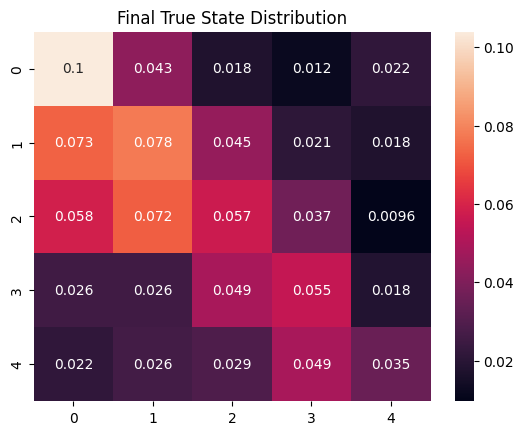

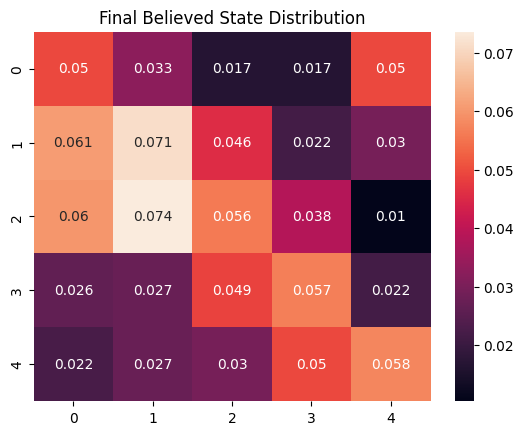

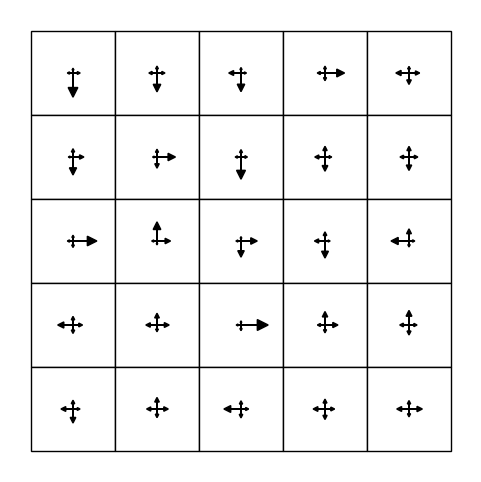

100%|█████████████████████████████████████████| 100/100 [00:43<00:00,  2.39it/s]

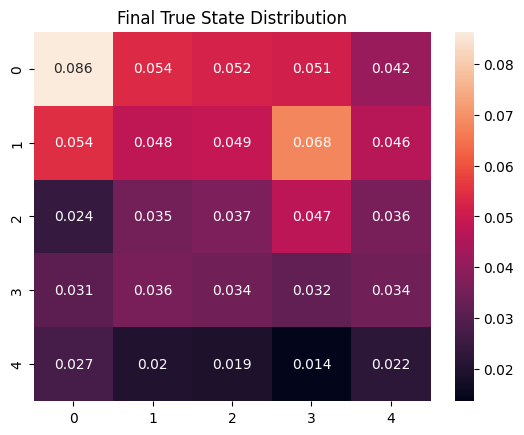

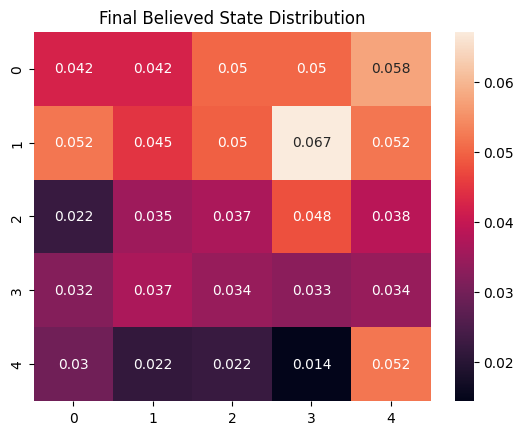

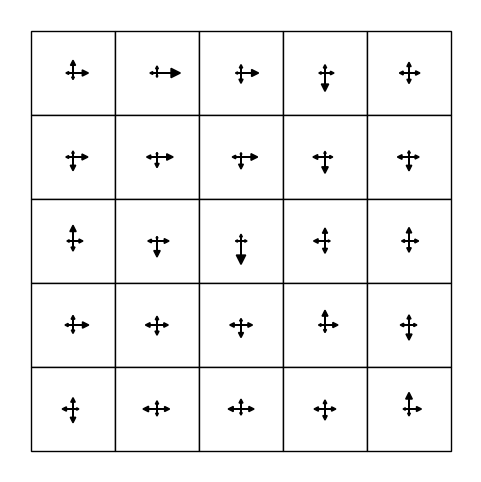

100%|█████████████████████████████████████████| 100/100 [00:44<00:00,  2.23it/s]


([2.212073577710857,
  2.2218456053297087,
  2.246964890864482,
  2.2229522995267788,
  2.2466419954597394,
  2.2168286480076906,
  2.248759009697245,
  2.1991955664137652,
  2.2606795534645014,
  2.2373659513698985,
  2.2398778466089544,
  2.230526008271526,
  2.245087614435333,
  2.238922962671602,
  2.192774765024526,
  2.28822081669024,
  2.281253226331764,
  2.290736273434403,
  2.272396895532646,
  2.2897573822020814,
  2.2668017666896905,
  2.257862492113194,
  2.270936056619061,
  2.3086712853340843,
  2.2141218691027262,
  2.290836094503688,
  2.2639939906948365,
  2.314205713196987,
  2.317139780331562,
  2.3077411679027042,
  2.315667645782566,
  2.3227989511476883,
  2.3074087678365114,
  2.3050412473441257,
  2.3256862629950144,
  2.268044729312301,
  2.304768132428802,
  2.292396817115838,
  2.306110946861044,
  2.3304610879708907,
  2.3430754378926517,
  2.3246207772988177,
  2.344301964713871,
  2.339583097703047,
  2.3398917063570153,
  2.3565405381044453,
  2.37271108

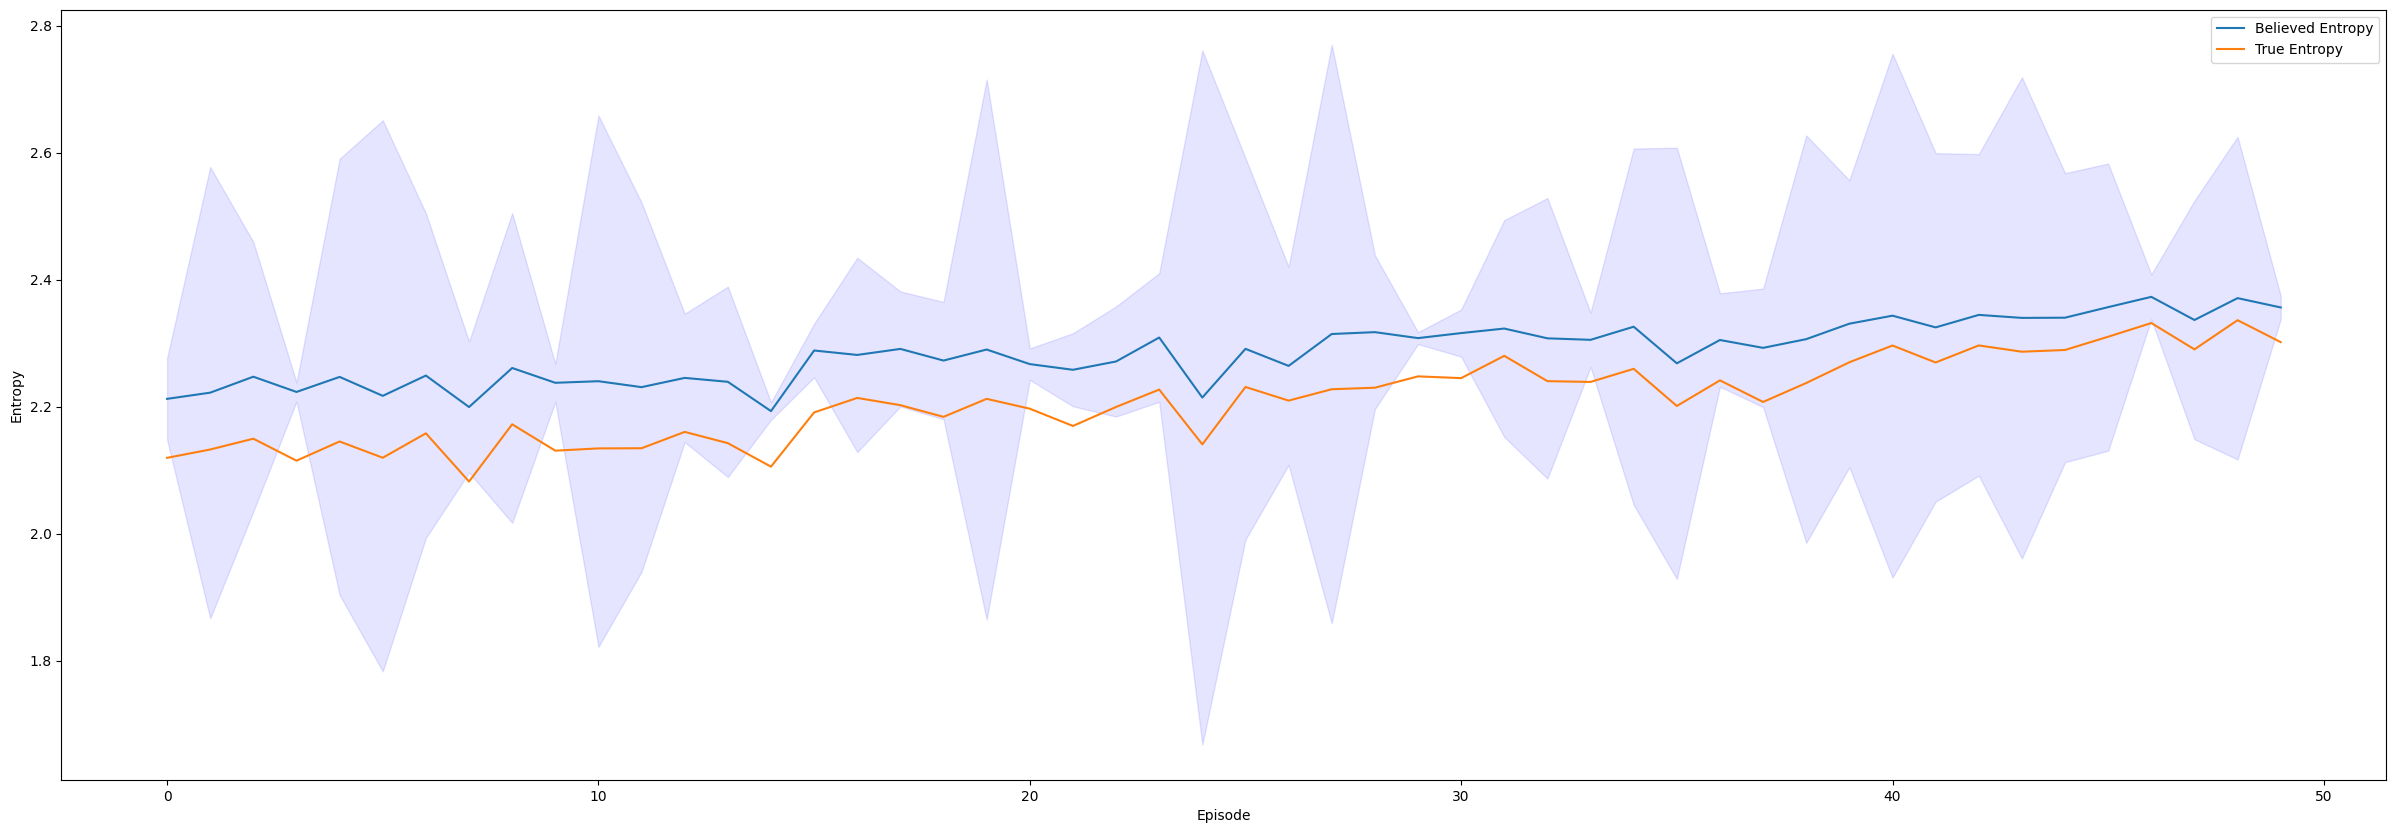

In [5]:
with tqdm(total=n_run * n_episodes, ncols=80) as pbar:
    # Train the agent and plot the entropies
    list_entropies = []
    list_true_entropies = []
    for r in range(n_run):
        ag = agents.REINFORCEAgentEPOMDP(env, alpha = 0.4)
        avg_entropies = []
        avg_true_entropies = []
        for i in range(n_episodes):
            episodes, entropies, true_entropies = ag.play(env=env, n_traj=n_traj)
            ag.update_multiple_sampling(episodes)
            avg_entropies.append(np.mean(entropies))
            avg_true_entropies.append(np.mean(true_entropies))
            pbar.update(1)
        ag.print_visuals(env=env, n_traj=n_traj)
        list_entropies.append(avg_entropies)
        list_true_entropies.append(avg_true_entropies)
    list_entropies = np.transpose(np.array(list_entropies), (1,0))
    list_true_entropies = np.transpose(np.array(list_true_entropies), (1,0))

plot_graph(n_run, n_episodes, list_entropies, list_true_entropies, confidence)